# Freiburg: A Workflow for Analyzing Large Corpora
In this jupyter notebook I will cover the basics of performing stylometric analysis on a large collection of Chinese texts, whether they be modern or classical.
## Using this notebook
The code in this notebook is distributed across a few different code blocks. You will need to run them top to bottom, but the actual analysis does not happen until the last block. To run everything, simply click on "Run All" in the "Cell" menu. I have also provided a plain python file that you can run from the commmand line.

## Importing necessary libraries
This code block imports the libraries I will use.

In [2]:
import re, os, sys, platform
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager

## Adjustable parameters: Analysis
The parameters that you might want to adjust for your analysis are contained in the following code block.

**tokenizeMethod** can be set to the string 'char' or the string 'word'. This will determine how the document is tokenized. 'char' is much faster and useful for classical documents. 'word' depends on the jieba library. If it is not installed, the code will prompt you to install it. 'word' tokenization is better for modern Chinese.

**ngrams** is an integer that will determine the size of n-gram you use for analysis. 1 will look at single characters (or words), 2 will look at two at a time, 3 will look at three at a time, etc. 1 grams work best for most analyses. More than 3 will be slow and often result in very sparse data that is hard to interpret.

**commonWords** is an integer that determines how frequent a character must be in the corpus to be considered in the stylometric analysis. 500 will use the 500 most common words across all texts. You can set this to None if you do not want to limit words in this way

**limitVocabulary** is a string in which you can specify the exact characters and words you want to consider. seperate them with a space.

In [3]:
# Word or character tokenization?
tokenizeMethod = "char" # use "word" for word based

# Size of n-grams:
ngrams = 1 # 1 will look at one character at a time, 2 will look at two, etc.

# Limit the number of words to look at
commonWords = 500 # Set to None if you want to look at all words or use custom vocab

# Set the vocabulary you are interested in
limitVocabulary = None # None will not use a vocab list
# limitVocabulary = "之 了 不 的 得 人".split(" ") # Uncomment to use specific vocab

## Adjustable parameters: Appearance
These parameters will help you set the appearance of the plot itself.

**labelTypes** is a tuple that specifies the nature of the corpus labeling. Here, the sample corpus files are all  named with the convention title_dynasty_siku_sikusub_author.txt. Each type of label is one element in this tuple, in the same order they appear in the name

**colorValue** this integer specifies which label should be used to generate a color scheme for the plot. 2 points to the 3rd element in the tuple, the siku categorization. There are three different siku categories reflected in the dataset, making this a good option. Here you should pick whichever label your analysis is focused on. More than 8 or so elements, however, will generate colors that are hard to tell apart.

**labelValue** this integer specifies which label should be used for labeling the points in the plot. 0 points to the 1st element in the tuple, the title.

**pointSize** is an integer that sets how large the points in the plot tare

**pointLabels** is a boolean (True or False) that specifies if the points should be labeled.

**plotLoadings** is a boolean that specifies if the vocabulary should be drawn on the plot (which will aid in interpretation). The further a term is from the center of the plot, the more it is influencing texts in a given direction.

**hidePoints** is a boolean that specifies of the points should be drawn. Set to False to see the loadings better.

**outputDimensions** is a tuple that sets the width and height of the output plot in inches

**outputFile** contains the name of the outputfile, where the plot will be saved. The file extension will determine file type. png, pdf, jpg, tif, and others are all valid selections. On Macs, because of an oddity of the plotting library, pdfs will be very large. You can fix this by opening the file with adobe illustrator (or another similar program) and then saving a copy. This is because the entire font is embedded in the file.

In [4]:
# Types of labels for documents in the corpus
labelTypes = ('title', 'dynasty', 'siku', 'sikusub', 'author')

# Index of label used to set Color:
colorValue = 2 # Index of label to use for color. Here 2 points to "siku"

# Index of label to use for plot labels (if points are labeled)
labelValue = 0 # Index of label to use for labels. Here 0 points to "title"

# Point size (set to integer)
pointSize = 8

# Show point labels (add labels for each text):
pointLabels = False # True or False

# Plot loadings (write the characters tot he plot)
plotLoadings = False # True or False

# Hide points (useful for seeing loadings better):
hidePoints = False # True or False

# Output file info (dimensions are in inches (width, height)):
outputDimensions = (10, 7.5)

# Output file extension determines output type. Save as a pdf if you want to edit in illustator
# PDF Output on mac is very large, but just opening and saving a copy in illustrator will fix this
outputFile = "myfigure.png"

## Adjustable Parameters: no need to change
This parameters can be adjusted, but you may as well leave them as they are.

**pcaComponents** is an integer that sets how many principal components should be calculated. We are only using two in this analysis, but as you work more with these plots, you can consider setting this higher (but you will also have to adjust later parts of the script to make them do anything). The maximum this can be is the number of variables (here the 500 words) minus one (so 499 in this case).

**corpusFolder** is the name of the folder that holds the corpus files. Just leave this as "corpus" if you put your files in a folder called "corpus".

**removeItems** is a string that contains the tokens that you do not want involved in the analysis, seperated by a space. Here I just include common punctuation that throw the analysis off.

In [10]:
# How many components?
pcaComponents = 2 # Only useful for digging even deeper in the data

# Input folder
corpusFolder = "corpus"

# Items to remove from consideration:
removeItems = "? , . ' \" 。 《 》 ， 、 【 】 ！ ？ “ ” ： ； ＜ （ ） ( ) - 「 」 〔 〕 ＞".split(" ")

# Nothing beyond here needs editing!!
The comments in the code itself explain what is happening. Once you run this, it will open a new window with your plot. It will look like the code keeps running until you close this window. This is an interactive explorer you can use to study the plot itself.

Loading, cleaning, and tokenizing
56 of 56 processed
Vectorizing
Normalizing values
Performing PCA
Setting plot info
Plotting texts


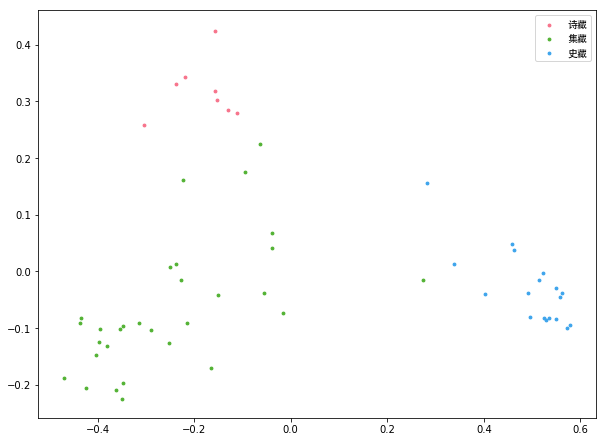

In [11]:
# Set the font
if platform.system() == "Darwin":
    font = matplotlib.font_manager.FontProperties(fname="/System/Library/Fonts/STHeiti Medium.ttc")
    matplotlib.rcParams['pdf.fonttype'] = 42
elif platform.system() == "Windows":
    font = matplotlib.font_manager.FontProperties(fname="C:\\Windows\\Fonts\\simsun.ttc")
elif platform.system() == "Linux":
    # This assumes you have wqy zenhei installed
    font = matplotlib.font_manager.FontProperties(fname="/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc")



# Extra modules will be loaded if you want to parse into words.
if tokenizeMethod == "word":
    try:
        import jieba
    except ImportError:
        print("For word tokenizing, you will need to install the jieba library")
        print("You can do so by running the following command (you may need to run as admin):")
        print("pip install jieba")
        sys.exit()

# Function to clean the text
def clean(text, removeitems):
    for item in removeitems:
        text = text.replace(item, "")
    text = re.sub("\s+", "", text)
    return text

# Function to tokenize the text. I've set it up so should have spaces between each token
def tokenize(text, tm = tokenizeMethod):
    if tm == "char":
        text = " ".join(list(text))
    elif tm == "word":
        # this uses the jieba library (you will need to install it), but there are other
        # good options out there, the best probably being stanford's parsers
        # this will be VERY slow
        text = " ".join(jieba.cut(text))  
    else:
        print("Set tokenizationMethod to either char or word")
    return text

print("Loading, cleaning, and tokenizing")
# Go through each document in the corpus folder and save info to lists
texts = []
labels = []

for root, dirs, files in os.walk(corpusFolder):
    for i, f in enumerate(files):
        # add the labels to the label list
        labels.append(f[:-4].split("_"))

        # Open the text, clean it, and tokenize it
        with open(os.path.join(root,f),"r", encoding='utf8') as rf:
            texts.append(tokenize(clean(rf.read(), removeItems)))
        
        if i == len(files) - 1:
            print(f"\r{i+1} of {len(files)} processed", end='\n', flush=True)
        else:
            print(f"\r{i+1} of {len(files)} processed", end='', flush=True)
# if tokenizeMethod == "word":
#     server.stop()


print("Vectorizing")
countVectorizer = TfidfVectorizer(max_features=commonWords, use_idf=False, vocabulary=limitVocabulary,  analyzer='word', token_pattern='\S+', ngram_range=(ngrams, ngrams))
countMatrix = countVectorizer.fit_transform(texts)
print("Normalizing values")
countMatrix = normalize(countMatrix)
countMatrix = countMatrix.toarray()

print("Performing PCA")
# Lets perform PCA on the countMatrix:
pca = PCA(n_components=2)
myPCA = pca.fit_transform(countMatrix)

print("Setting plot info")
# set the plot size
plt.figure(figsize=outputDimensions)

# find all the unique values for each of the label types
uniqueLabelValues = [set() for i in range(len(labelTypes))]
for labelList in labels:
    for i, label in enumerate(labelList):
        uniqueLabelValues[i].add(label)

# create color dictionaries for each of the texts
colorDictionaries = []
for uniqueLabels in uniqueLabelValues:
    colorpalette = sns.color_palette("husl",len(uniqueLabels))
    colorDictionaries.append(dict(zip(uniqueLabels,colorpalette)))

# Now we need the Unique Labels
uniqueColorLabels = list(uniqueLabelValues[colorValue])
# Let's get a number for each class
numberForClass = [i for i in range(len(uniqueColorLabels))]

# Make a dictionary! This is new sytax for us! It just makes a dictionary where
# the keys are the unique years and the values are found in numberForClass
labelForClassNumber = dict(zip(uniqueColorLabels,numberForClass))

# Let's make a new representation for each document that is just these integers
# and it needs to be a numpy array
textClass = np.array([labelForClassNumber[lab[colorValue]] for lab in labels])


# Make a list of the colors
colors = [colorDictionaries[colorValue][lab] for lab in uniqueColorLabels]

if hidePoints:
    pointSize = 0

print("Plotting texts")
for col, classNumber, lab in zip(colors, numberForClass, uniqueColorLabels):
    plt.scatter(myPCA[textClass==classNumber,0],myPCA[textClass==classNumber,1],label=lab,c=col, s=pointSize)

# Let's label individual points so we know WHICH document they are
if pointLabels:
    print("Adding Labels")
    for lab, datapoint in zip(labels, myPCA):
        plt.annotate(str(lab[labelValue]),xy=datapoint, fontproperties=font)

# Let's graph component loadings
if plotLoadings:
    print("Rendering Loadings")
    loadings = pca.components_
    vocabulary = countVectorizer.get_feature_names()
    
    for i, word in enumerate(vocabulary):
        plt.annotate(word, xy=(loadings[0, i], loadings[1,i]), fontproperties=font)
    

# Let's add a legend! matplotlib will make this for us based on the data we 
# gave the scatter function.
plt.legend(prop=font)
plt.savefig(outputFile)

plt.show()